In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
os.getcwd()

'C:\\Users\\LENOVO'

In [3]:
stock_data = pd.read_csv('Market_Risk_Dataset.csv')

In [4]:
stock_data.head()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [5]:
stock_data.columns = stock_data.columns.str.replace(' ','_')

In [6]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 314 non-null    object
 1   Infosys              314 non-null    int64 
 2   Indian_Hotel         314 non-null    int64 
 3   Mahindra_&_Mahindra  314 non-null    int64 
 4   Axis_Bank            314 non-null    int64 
 5   SAIL                 314 non-null    int64 
 6   Shree_Cement         314 non-null    int64 
 7   Sun_Pharma           314 non-null    int64 
 8   Jindal_Steel         314 non-null    int64 
 9   Idea_Vodafone        314 non-null    int64 
 10  Jet_Airways          314 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 27.1+ KB


In [7]:
stock_data.describe()

,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,511.340764,114.560510,636.678344,540.742038,59.095541,14806.410828,633.468153,147.627389,53.713376,372.659236
std,135.952051,22.509732,102.879975,115.835569,15.810493,4288.275085,171.855893,65.879195,31.248985,202.262668
min,234.000000,64.000000,284.000000,263.000000,21.000000,5543.000000,338.000000,53.000000,3.000000,14.000000
25%,424.000000,96.000000,572.000000,470.500000,47.000000,10952.250000,478.500000,88.250000,25.250000,243.250000
50%,466.500000,115.000000,625.000000,528.000000,57.000000,16018.500000,614.000000,142.500000,53.000000,376.000000
75%,630.750000,134.000000,678.000000,605.250000,71.750000,17773.250000,785.000000,182.750000,82.000000,534.000000
max,810.000000,157.000000,956.000000,808.000000,104.000000,24806.000000,1089.000000,338.000000,117.000000,871.000000


In [8]:
stock_data.isnull().sum()

Date                   0
Infosys                0
Indian_Hotel           0
Mahindra_&_Mahindra    0
Axis_Bank              0
SAIL                   0
Shree_Cement           0
Sun_Pharma             0
Jindal_Steel           0
Idea_Vodafone          0
Jet_Airways            0
dtype: int64

In [9]:
stock_data.shape

(314, 11)

### 2.1 Draw Stock Price Graph(Stock Price vs Time) for any 2 given stocks with inference

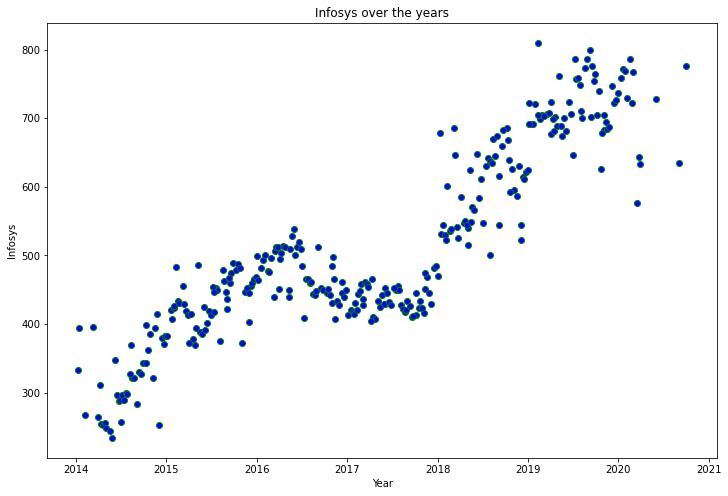

In [26]:
plt.figure(figsize = (12,8))
stock_data['dates'] = [pd.to_datetime(d) for d in stock_data['Date']]
plt.scatter(stock_data['dates'], stock_data['Infosys'], edgecolors = 'g', color = 'blue')
plt.xlabel('Year')
plt.ylabel('Infosys')
plt.title('Infosys over the years')
plt.show()

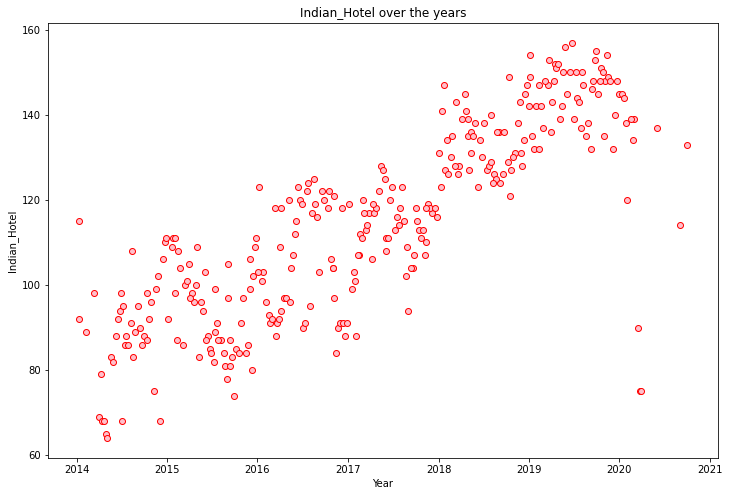

In [27]:
plt.figure(figsize = (12,8))
plt.scatter(stock_data['dates'], stock_data['Indian_Hotel'], edgecolors = 'r', color = 'pink')
plt.xlabel('Year')
plt.ylabel('Indian_Hotel')
plt.title('Indian_Hotel over the years')
plt.show()

### 2.2 Calculate Returns for all stocks with inference

In [12]:
stock_returns = np.log(stock_data.drop(['Date','dates'], axis = 1).diff(axis = 0, periods = 1))

In [13]:
stock_returns.head(50)

,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1.098612,2.564949,0.693147,5.220356,4.007333,NaN,0.0,3.218876
2,NaN,-inf,NaN,NaN,NaN,NaN,NaN,-inf,NaN,NaN
3,NaN,-inf,3.526361,2.564949,-inf,3.761200,NaN,NaN,-inf,0.693147
4,1.098612,NaN,NaN,NaN,NaN,NaN,1.945910,NaN,NaN,NaN


In [14]:
stock_data['Infosys_returns'] = stock_data['Infosys'].pct_change()

In [15]:
stock_data['Infosys_returns'].head()

0         NaN
1   -0.026515
2   -0.011673
3   -0.003937
4    0.011858
Name: Infosys_returns, dtype: float64

In [16]:
stock_data['Indian_Hotel_returns'] = stock_data['Indian_Hotel'].pct_change()
stock_data['Mahindra&Mahindra_returns'] = stock_data['Mahindra_&_Mahindra'].pct_change()
stock_data['Axis_Bank_returns'] = stock_data['Axis_Bank'].pct_change()
stock_data['SAIL_returns'] = stock_data['SAIL'].pct_change()
stock_data['Shree_Cement_returns'] = stock_data['Shree_Cement'].pct_change()
stock_data['Sun_Pharma_returns'] = stock_data['Sun_Pharma'].pct_change()
stock_data['Jindal_Steel_returns'] = stock_data['Jindal_Steel'].pct_change()
stock_data['Idea_Vodafone_returns'] = stock_data['Idea_Vodafone'].pct_change()
stock_data['Jet_Airways_returns'] = stock_data['Jet_Airways'].pct_change()

In [17]:
stock_returns = stock_data[['Infosys_returns','Indian_Hotel_returns','Mahindra&Mahindra_returns','Axis_Bank_returns','SAIL_returns','Shree_Cement_returns','Sun_Pharma_returns','Jindal_Steel_returns','Idea_Vodafone_returns','Jet_Airways_returns']]

In [18]:
stock_returns.head(10)

,Infosys_returns,Indian_Hotel_returns,Mahindra&Mahindra_returns,Axis_Bank_returns,SAIL_returns,Shree_Cement_returns,Sun_Pharma_returns,Jindal_Steel_returns,Idea_Vodafone_returns,Jet_Airways_returns
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.026515,-0.014493,0.006593,0.049430,0.029412,0.033375,0.099099,-0.063758,0.012048,0.089928
2,-0.011673,0.000000,-0.008734,-0.021739,-0.028571,-0.013792,-0.004918,0.000000,-0.011905,-0.075908
3,-0.003937,0.000000,0.074890,0.048148,0.000000,0.007612,-0.004942,-0.017921,0.000000,0.007143
4,0.011858,-0.044118,-0.012295,-0.003534,-0.073529,-0.019325,0.011589,-0.131387,-0.048193,-0.138298
5,-0.031250,-0.015385,0.041494,0.063830,0.063492,0.011465,-0.008183,0.025210,0.012658,-0.016461
6,0.020161,0.062500,0.011952,0.080000,0.119403,0.069961,-0.016502,0.102459,0.050000,0.020921
7,-0.035573,0.220588,0.039370,0.061728,0.146667,0.058434,-0.048658,0.111524,-0.023810,0.184426
8,-0.040984,-0.012048,0.066288,-0.014535,-0.023256,0.049265,0.045855,-0.010033,-0.012195,-0.166090
9,0.145299,0.085366,-0.003552,0.073746,0.238095,0.110896,-0.018550,0.141892,0.024691,0.074689


### 2.3 Calculate Stock Means and Standard Deviation for all stocks with inference

In [19]:
stock_means = stock_returns.mean(axis = 0)
stock_means

Infosys_returns              0.003409
Indian_Hotel_returns         0.001369
Mahindra&Mahindra_returns   -0.000717
Axis_Bank_returns            0.002201
SAIL_returns                -0.001521
Shree_Cement_returns         0.004487
Sun_Pharma_returns          -0.000451
Jindal_Steel_returns        -0.001313
Idea_Vodafone_returns       -0.005080
Jet_Airways_returns         -0.004805
dtype: float64

In [20]:
stock_sd = stock_returns.std(axis = 0)
stock_sd

Infosys_returns              0.034910
Indian_Hotel_returns         0.046914
Mahindra&Mahindra_returns    0.039029
Axis_Bank_returns            0.045018
SAIL_returns                 0.062899
Shree_Cement_returns         0.040192
Sun_Pharma_returns           0.044616
Jindal_Steel_returns         0.075079
Idea_Vodafone_returns        0.110075
Jet_Airways_returns          0.096473
dtype: float64

### 2.4 Draw a plot of Stock Means vs Standard Deviation and state your inference

In [21]:
df = pd.DataFrame({'Average':stock_means, 'Volatility': stock_sd})
df

,Average,Volatility
Infosys_returns,0.003409,0.034910
Indian_Hotel_returns,0.001369,0.046914
Mahindra&Mahindra_returns,-0.000717,0.039029
Axis_Bank_returns,0.002201,0.045018
SAIL_returns,-0.001521,0.062899
Shree_Cement_returns,0.004487,0.040192
Sun_Pharma_returns,-0.000451,0.044616
Jindal_Steel_returns,-0.001313,0.075079
Idea_Vodafone_returns,-0.005080,0.110075
Jet_Airways_returns,-0.004805,0.096473


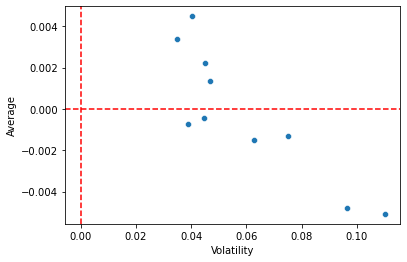

In [22]:
plot = sns.scatterplot(df['Volatility'], df['Average'])
plot.axvline(linestyle='--', color = "red")
plot.axhline(linestyle='--', color = "red")
plt.show()

In [23]:
df[df['Average'] > 0].sort_values(by = 'Volatility')

,Average,Volatility
Infosys_returns,0.003409,0.034910
Shree_Cement_returns,0.004487,0.040192
Axis_Bank_returns,0.002201,0.045018
Indian_Hotel_returns,0.001369,0.046914


### 2.5 Conclusion and Recommendations

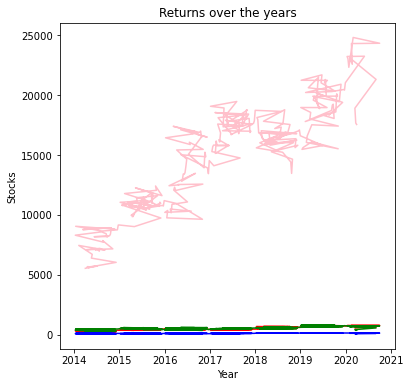

In [41]:
plt.figure(figsize = (6,6))
plt.plot(stock_data['dates'], stock_data['Infosys'], color = 'red')
plt.plot(stock_data['dates'], stock_data['Axis_Bank'], color = 'green')
plt.plot(stock_data['dates'], stock_data['Indian_Hotel'], color = 'blue')
plt.plot(stock_data['dates'], stock_data['Shree_Cement'], color = 'pink')
plt.xlabel('Year')
plt.ylabel('Stocks')
plt.title('Returns over the years')
plt.show()

We can conclude that Infosys, Shree Cement, Axis Bank and Indian Hotel have low Volatility value and high Average returns value. So that we can recommend to buy these 4 stocks.

Volatility is one of the most important pillars in financial markets. A stock is said to have high volatility if its value can change dramatically within a short span of time. On other hand, lower volatility means that value of stock tends to be relatively steady over a period of time. These movements are due to several factors including demand and supply, sentiment, corporate actions, greed, and fear, etc. Mathematically, volatility is measured using a statistical measure called ‘standard deviation’, which measures an asset’s departure from its average value.
We have already calculated the daily returns of the given stocks.

Infosys, Shree Cement, Axis Bank and Indian Hotel in increasing trend and we can recommend to check the minimum value for purchase to get high returns.